# Xây dựng model nhận diện chử viêt tay Việt Nam (OCR)

## Thêm các thư viện

In [1]:
# Tensorflow
# OpenCV
# Zipfile
# Gridspec
# Matplotlib
# Chạy các lệnh sau ở terminal nếu dùng conda hoặc dùng pip install thay thế


# conda activate vietnamese-ocr
# conda install -c conda-forge opencv
# conda install -c conda-forge tensorflow
# conda install -c anaconda scikit-learn
# conda install -c conda-force Matplotlib
# conda install -c conda-forge editdistance  

## Đọc và trực quan hóa dữ liệu

### Kiểm tra GPU

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    # Không nên train nếu không có GPU
    raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
import zipfile  
import pathlib
import os
#Đọc dữ liệu train từ file zip
#TRAIN_DATA_ZIP_PATH = "data/Train_Data.zip"
#with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH, 'r') as zip_ref:
#    zip_ref.extractall("vietnamese_hcr/raw")

current_directory_path = pathlib.Path("./vietnamese_hcr").absolute()

DATA_PATH = os.path.join('/vietnamese_hcr', "data")
TEST_FOLDER = os.path.join(DATA_PATH, "test")
TRAIN_FOLDER = os.path.join(DATA_PATH, "train")

# raw folders
RAW_FOLDER = os.path.join(str(current_directory_path),"raw")

# label json files
TRAIN_JSON = os.path.join(RAW_FOLDER, "labels.json")
RAW_FOLDER
TRAIN_JSON

#os.makedirs(DATA_PATH)
#os.makedirs(TEST_FOLDER)
#os.makedirs(TRAIN_FOLDER)

'd:\\Work Or Study\\Python\\Vietnamese OCR\\Vietnamese-handwritten-recognition\\vietnamese_hcr\\raw\\labels.json'

In [7]:
#Đọc dữ liệu file json 
import json
# Đọc các label
with open(TRAIN_JSON, 'r', encoding='utf8') as f:
    train_labels = json.load(f)

Dữ liệu label ảnh

In [ ]:
train_labels

{'1.jpg': 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '2.jpg': 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '3.jpg': '58 Thái Thịnh, Đống Đa, Hà Nội',
 '4.jpeg': 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '5.jpg': 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '6.jpg': 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 '7.jpg': '40 Cát Linh, Đống Đa, Hà Nội',
 '8.jpg': 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 '9.JPG': 'Nhà 87 ngõ 416 Đê La Thành',
 '10.JPG': 'Up coworking Space, 89 Láng Hạ, Hà Nội',
 '11.jpg': '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 '12.jpg': 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 '13.jpg': '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 '14.jpg': '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '15.jpg': '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 '0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '

In [8]:
# Tìm tất cả các ký tự trong nhãn
char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)
len(char_list)

140

In [ ]:
# Có tổng 140 ký tự trong bộ dữ liệu và in ra kết quả
"".join(char_list)

" #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"

In [ ]:
# Chuyển đổi bộ dữ liệu trên thành mảng được đánh dấu thông qua thứ tự
def encode_to_labels(txt):
    # Tạo mảng lưu trử các chỉ số của các ký tự
    dig_lst = []
    # Với mỗi ký tự trong txt lặp qua từng ký tự kèm theo index
    for index, char in enumerate(txt):
        try:
            # Tìm chỉ số hiện tại của kts tự bên trong char_list
            dig_lst.append(char_list.index(char))
        except:
            # In ra ký tự mà không có trong danh sách đã tìm ở trên
            print("No found in char_list :", char)
        
    return dig_lst

In [ ]:
encode_to_labels("Tiếng Việt thì không có ký tự f đâu nhé")

No found in char_list : f


[40,
 53,
 109,
 57,
 51,
 0,
 42,
 53,
 113,
 63,
 0,
 63,
 52,
 80,
 0,
 54,
 52,
 84,
 57,
 51,
 0,
 48,
 83,
 0,
 54,
 88,
 0,
 63,
 135,
 0,
 0,
 91,
 75,
 64,
 0,
 57,
 52,
 78]

In [ ]:
# Tìm tất cả đường dẫn hình ảnh cho thư mục train và test folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))

In [ ]:
train_image_path[:10]

['d:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0009_samples.png']

## Tiền xử lý

#### Các công việc cần xử lý
- Tìm tất các chiều dài và rộng của ảnh
- Sử dụng OpenCV đọc ảnh 
- Chuyển về greyscale
- Resize về cùng 1 kích thước
- Chia bộ dữ liệu train và test
- Build CRNN model with CTC loss
- Prediction
- Calculate metrics for SER, WER and CER

In [ ]:
#Tạo ra từ điển để lưu đường dẫn tuyệt đối các tệp hình ảnh và label
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [ ]:
dict_filepath_label

{'d:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0003_samples.png': '42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0004_samples.png': '200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0005_samples.png': '27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0006_samples.pn

In [ ]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [ ]:
all_image_paths = list(dict_filepath_label.keys())

In [ ]:
all_image_paths[:10]

['d:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\Work Or Study\\Python\\Final PID\\vietnamese_hcr\\raw\\data\\0009_samples.png']

In [ ]:
import cv2
# Tìm tất các chiều dài chiều rộng bên trong bộ dữ liệu ảnh
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [ ]:
#Lấy ra max,min của dài và rộng
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [ ]:
# In thông tin để quyết định thay đổi kích thước và vùng đệm cho ảnh
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [ ]:
# chia 2 bộ dữ liệu con với test size 20%
from sklearn.model_selection import train_test_split
test_size = 0.2
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

In [ ]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 240

In [ ]:
# Xây dựng pipeline xử lý ảnh đầu vào. Để train cho model OCR

import numpy as np

# Danh sách tập train
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
i=0
for train_img_path in train_image_paths:
   
    # Đọc và chuyển ảnh xám
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # Thực hiện resize ảnh.
    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    #Làm mờ ảnh
    img = cv2.GaussianBlur(img, (5,5), 0)

    #Threshold the image ngưỡng tối đa 255 dùng phương pháp GAUSSAIAN, 11-4 dùng để tính toán ngưỡng thích ứng
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    #Thêm kênh
    img = np.expand_dims(img , axis = 2)
    
    # Chuẩn hóa giá trị 0 - 255
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # chia tập validation và training dataset 10% / 90%
    orig_txt.append(label)   
    train_label_length.append(len(label))

    # Thêm img vào tập huấn luyện với step
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # Chuyển các từ trong label thành dạng số
    training_txt.append(encode_to_labels(label)) 
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))
print(resize_max_width)

has processed trained 500 files
has processed trained 1000 files
2167


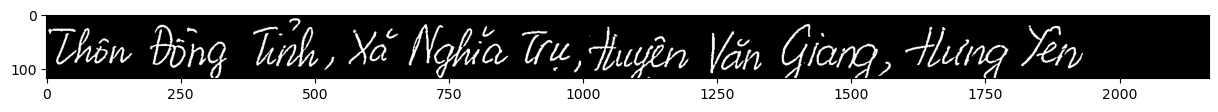

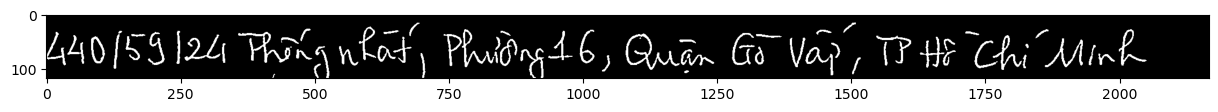

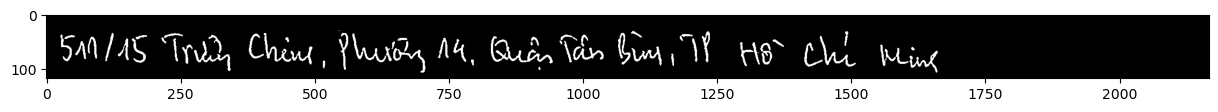

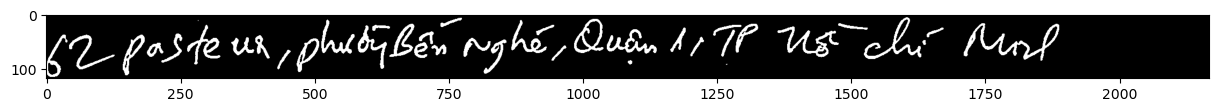

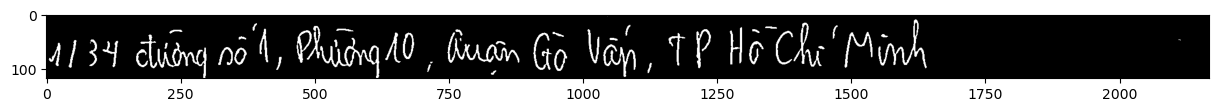

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [ ]:
#Danh sách tập validation
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]  
    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    img = cv2.GaussianBlur(img, (5,5), 0)

   
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    

    img = np.expand_dims(img , axis = 2)
    

    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))


    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    valid_txt.append(encode_to_labels(label))
    i+=1
    if (i%500 == 0):
        print ("has processed test {} files".format(i))
print(resize_max_width)

2167


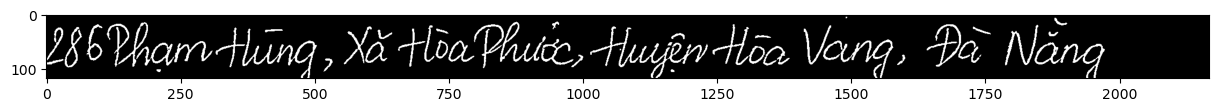

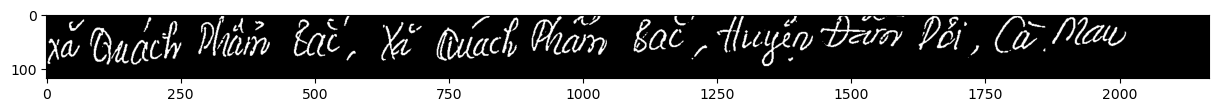

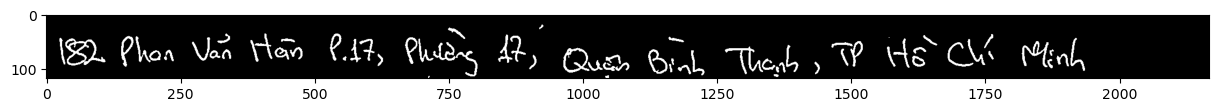

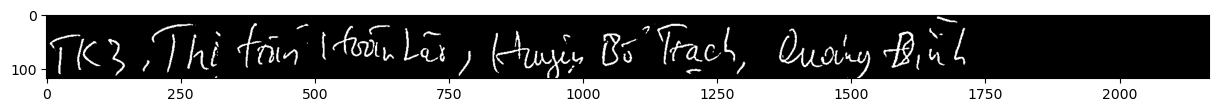

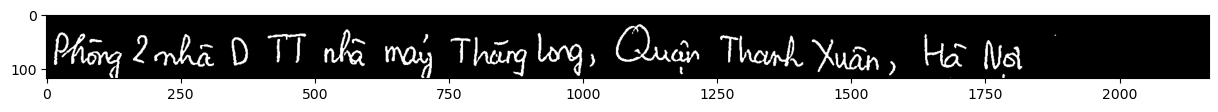

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.show()

In [ ]:
# max_label_len là độ dài tối đa của các nhãn (labels) được sử dụng trong quá trình huấn luyện mô hình
# TIME_STEPS là số lượng các khung hình (frames) được sử dụng để đưa ra dự đoán.
max_label_len = TIME_STEPS 

In [ ]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

#  thêm các giá trị đệm (padding) cho các nhãn đầu ra (output labels)
#  đến độ dài tối đa giúp giữ cho việc huấn luyện mô hình với RNN nhất quán (consistent).
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [ ]:
train_padded_txt[0]

array([ 40,  52,  84,  57,   0,  90, 119,  57,  51,   0,  40, 114,  57,
        52,   6,   0,  44,  76,   0,  34,  51,  52,  92,  46,   0,  40,
        61, 128,   6,   0,  28,  64,  68, 113,  57,   0,  42,  89,  57,
         0,  27,  53,  46,  57,  51,   6,   0,  28,  96,  57,  51,   0,
        45,  79,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Model Building

In [ ]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# Mô hình CRNN và LSTM nhận dạng ký tự

# input with shape of height=32 and width=128 
inputs = Input(shape=(118,2167,1))
 
# Tạo ra các block Conv2D để trích xuất đặt trưng của ảnh có kernel = 3 và filter từ 64->1024
# padding là 'same' để giữ nguyên kích thước của đầu vào và đầu ra
# kernel và strides được đặt là (3,3) để giảm kích thước của đầu ra xuống còn 1/3 kích thước của đầu vào.

# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
x = MaxPool2D(pool_size=(3, 1))(x)
 
# Lambda được sử dụng để loại bỏ chiều thứ nhất của tensor đầu ra (chiều batch_size) 
# và đưa ra đầu ra có hình dạng (height, width, channels).
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# # # ỗi khối LSTM có 512 đơn vị đầu ra và sử dụng dropout để tránh tình trạng overfitting.
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

# this is our softmax character proprobility with timesteps 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [ ]:
act_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 118, 2167,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 118, 2167, 6  640         ['input_1[0][0]']                
                                4)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 722, 64)  0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [36]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath=os.path.join('model_crnn_ctc.hdf5'),
        monitor='val_loss',
        save_best_only=False,
        save_weights_only=False,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 118, 2167,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 118, 2167, 6  640         ['input_1[0][0]']                
                                4)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 722, 64)  0           ['conv2d[0][0]']                 
                                                                                            

In [38]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)



In [39]:
# đặt batchsize and epochs

batch_size = 32
epochs = 100

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)
model.save('model_crnn_ctc.hdf5')

Epoch 1/100


KeyboardInterrupt: 

: 

## Evaluation

In [46]:
# load the saved best model weights
act_model.load_weights(os.path.join('model_crnn_ctc.hdf5'))

In [47]:
# predict outputs on validation images
NO_PREDICTS = 100
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img)

12/12 [==============================] - 128s 10s/step


In [48]:
# NO_PREDICTS image results
# 9 timesteps
# 32 chars + 1 blank
prediction.shape

(368, 240, 141)

In [49]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

original_text  =  286 Phạm Hùng, Xã Hoà Phước, Huyện Hoà Vang, Đà Nẵng
predicted text = 286 Phạm Hùng, Xã Hòoa Phước, Huyện Hòoa Vang, Đà Nẵng
original_text  =  xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
predicted text = xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
original_text  =  182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
predicted text = 182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
original_text  =  TK 3, Thị trấn Hoàn Lão, Huyện Bố Trạch, Quảng Bình
predicted text = TK 3, Thị trấn Hoàn Lão, Huyện Bố Trạch, Quảng Bình
original_text  =  Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
predicted text = Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
original_text  =  Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
predicted text = Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
original_text  =  Tầng 8, 57-59 Hồ Tùng Mậu, Phường Bến Nghé, Quận 1, TP Hồ 

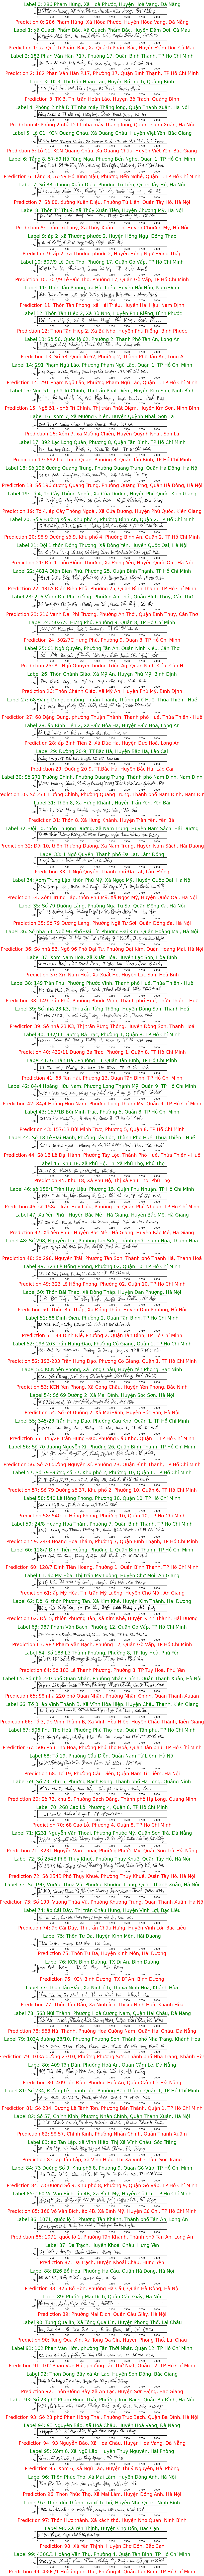

In [50]:
#YOUR PART: WRITE TO PRINT OUT THE IMAGES IN NICE 2D ARRAY PLOT WITH ORIGINAL TEXT AND PREDICTED TEXT 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")


In [51]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [52]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [53]:
print(e_corpus)

Metrics:
Character Error Rate: 0.016172909658972657
Word Error Rate:      0.05156071394682326
Sequence Error Rate:  0.32608695652173914


CER ~ 4% | WER ~ 15%

# Tham khảo
#### Dataset: https://drive.google.com/file/d/1-hAGX91o45NA4nv1XUYw5pMw4jMmhsh5/
#### Vietnamese Handwriting Recongintio OCR: https://github.com/TomHuynhSG/vietnamese-handwriting-recognition-ocr